In [14]:
import pandas as pd

# Bước 1: Đọc file CSV
file_path = "../data/cleaned/cleaned_population.csv"  
data = pd.read_csv(file_path)

# Bước 2: Kiểm tra cấu trúc dữ liệu
print(data.head())

# Sắp xếp dữ liệu để đảm bảo theo tỉnh và năm
data = data.sort_values(by=["Provinces/city", "Year"]).reset_index(drop=True)

# Bước 3: Tính tỷ lệ gia tăng cho từng tỉnh
def calculate_growth_rate(group):
    group = group.sort_values(by="Year")  # Đảm bảo đúng thứ tự thời gian
    group["Growth_Rate (%)"] = group["15+ labor"].pct_change() * 100
    return group

# Áp dụng tính toán cho từng tỉnh
result = data.groupby("Provinces/city").apply(calculate_growth_rate)

# Bước 4: Xem kết quả
print(result)

# Bước 5: Lưu kết quả ra file CSV mới
result.to_csv("labor_growth_rate_by_province.csv", index=False)




  Provinces/city  Population density  Average population  Sex ratio  \
0         Ha Noi              2031.1              6761.3       97.8   
1      Vinh Phuc               818.0              1011.4       97.6   
2       Bac Ninh              1292.6              1063.4       96.7   
3     Quang Ninh               191.4              1168.0      105.4   
4      Hai Duong              1044.6              1729.8       96.1   

   Population grow ratio  15+ labor            Region  Year  
0                   1.93     3572.9  Hong river Delta  2011  
1                   0.38      608.3  Hong river Delta  2011  
2                   1.84      593.5  Hong river Delta  2011  
3                   0.93      675.0  Hong river Delta  2011  
4                   0.78     1071.0  Hong river Delta  2011  
                   Provinces/city  Population density  Average population  \
Provinces/city                                                              
An Giang       0         An Giang              

C:\Users\phucy\AppData\Local\Temp\ipykernel_15460\2202571126.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = data.groupby("Provinces/city").apply(calculate_growth_rate)


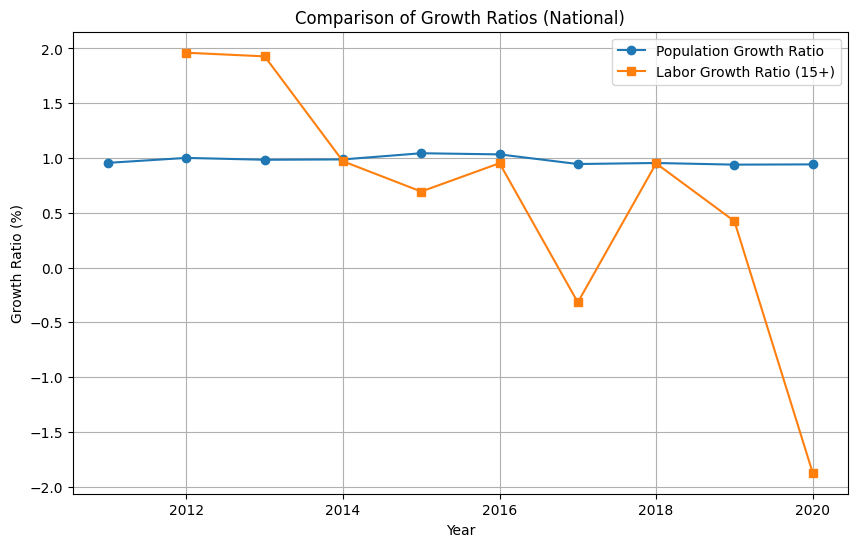

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

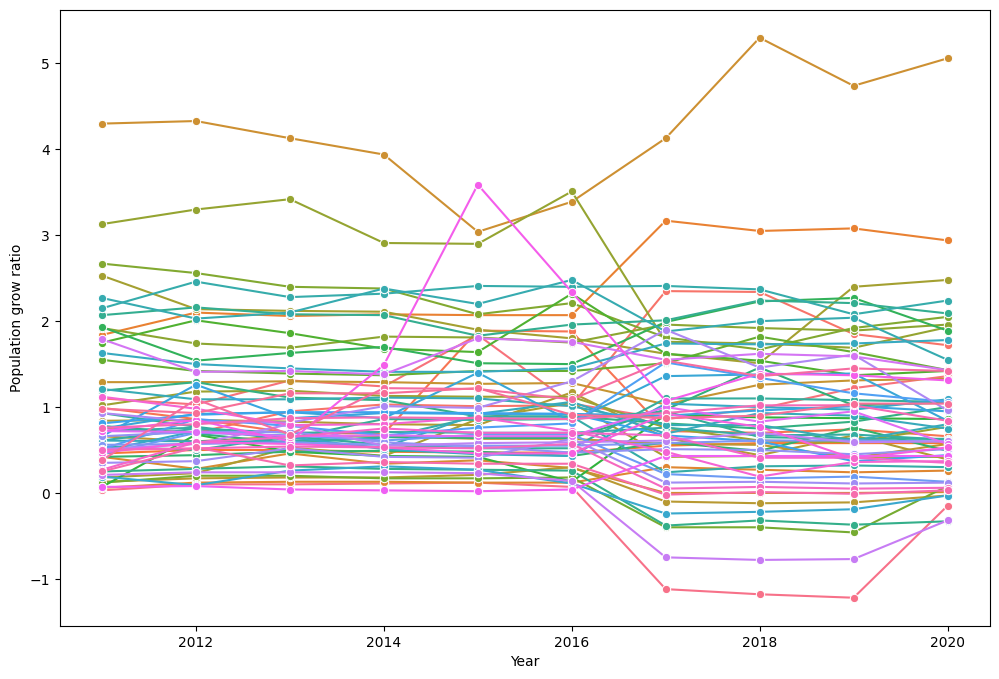

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đọc dữ liệu
file_path = "../notebooks/labor_growth_rate_by_province.csv"  # File sau khi tính toán
data = pd.read_csv(file_path)

# Giả sử cột "Population_Growth_Ratio" đã có trong dữ liệu gốc
# Nếu không có, bạn cần tính thêm tỷ lệ này trước

# Bước 2: Tính trung bình toàn quốc theo năm
national_avg = data.groupby("Year").agg({
    "Population grow ratio": "mean",
    "Growth_Rate (%)": "mean"
}).reset_index()

# Bước 3: Tính trung bình theo từng khu vực
region_avg = data.groupby(["Provinces/city", "Year"]).agg({
    "Population grow ratio": "mean",
    "Growth_Rate (%)": "mean"
}).reset_index()

# Bước 4: Vẽ biểu đồ toàn quốc
plt.figure(figsize=(10, 6))
plt.plot(national_avg["Year"], national_avg["Population grow ratio"], marker='o', label="Population Growth Ratio")
plt.plot(national_avg["Year"], national_avg["Growth_Rate (%)"], marker='s', label="Labor Growth Ratio (15+)")
plt.title("Comparison of Growth Ratios (National)")
plt.xlabel("Year")
plt.ylabel("Growth Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()

# Bước 5: Vẽ biểu đồ theo từng khu vực
plt.figure(figsize=(12, 8))
sns.lineplot(data=region_avg, x="Year", y="Population grow ratio", hue="Provinces/city", marker='o', label="Population Growth")
sns.lineplot(data=region_avg, x="Year", y="Growth_Rate (%)", hue="Province", marker='s', label="Labor Growth (15+)")
plt.title("Comparison of Growth Ratios by Province")
plt.xlabel("Year")
plt.ylabel("Growth Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def ve_bieu_do_so_sanh(df, cot_nam, cot_ti_le_1, ten_cot_1, cot_ti_le_2, ten_cot_2, tieu_de="Biểu đồ so sánh tỷ lệ gia tăng"):
    try:
        df[cot_ti_le_1] = pd.to_numeric(df[cot_ti_le_1], errors='coerce')
        df[cot_ti_le_2] = pd.to_numeric(df[cot_ti_le_2], errors='coerce')
        df_cleaned = df.dropna(subset=[cot_ti_le_1, cot_ti_le_2])
        if df_cleaned.empty:
            print(f"Không có dữ liệu hợp lệ để vẽ biểu đồ: {tieu_de}")
            return

        plt.figure(figsize=(10, 6))
        plt.plot(df_cleaned[cot_nam], df_cleaned[cot_ti_le_1], marker='o', label=ten_cot_1)
        plt.plot(df_cleaned[cot_nam], df_cleaned[cot_ti_le_2], marker='x', label=ten_cot_2)

        plt.xlabel("Năm")
        plt.ylabel("Tỷ lệ gia tăng (%)")
        plt.title(tieu_de)
        plt.xticks(df_cleaned[cot_nam], rotation=45)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except (KeyError,TypeError) as e:
        print(f"Lỗi: {e}")
    except Exception as e:
        print(f"Lỗi không xác định: {e}")

try:
    df = pd.read_csv("../notebooks/labor_growth_rate_by_province.csv")
    #Ép kiểu dữ liệu cột 'Year'
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    # Tính tỷ lệ gia tăng lực lượng lao động 15+

    if df is not None:
        # 1. Biểu đồ cho toàn quốc:
        df_grouped = df.groupby('Year').mean(numeric_only=True).reset_index()
        ve_bieu_do_so_sanh(df_grouped, 'Year', 'Population grow ratio', "Tỷ lệ tăng trưởng dân số", 'Growth_Rate (%)', "Tỷ lệ gia tăng lực lượng lao động 15+", "Toàn quốc")

        # 2. Biểu đồ theo khu vực:
        for region in df['Region'].unique():
            df_region = df[df['Region'] == region]
            df_region_grouped = df_region.groupby('Year').mean(numeric_only=True).reset_index()
            ve_bieu_do_so_sanh(df_region_grouped, 'Year', 'Population grow ratio', "Tỷ lệ tăng trưởng dân số", 'Growth_Rate (%)', "Tỷ lệ gia tăng lực lượng lao động 15+", f"Region: {region}")
    else:
        print("Đã xảy ra lỗi khi tính toán tỷ lệ gia tăng.")
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file CSV. Hãy kiểm tra đường dẫn.")
except Exception as e:
    print(f"Lỗi không xác định: {e}")

Lỗi: Không tìm thấy file CSV. Hãy kiểm tra đường dẫn.


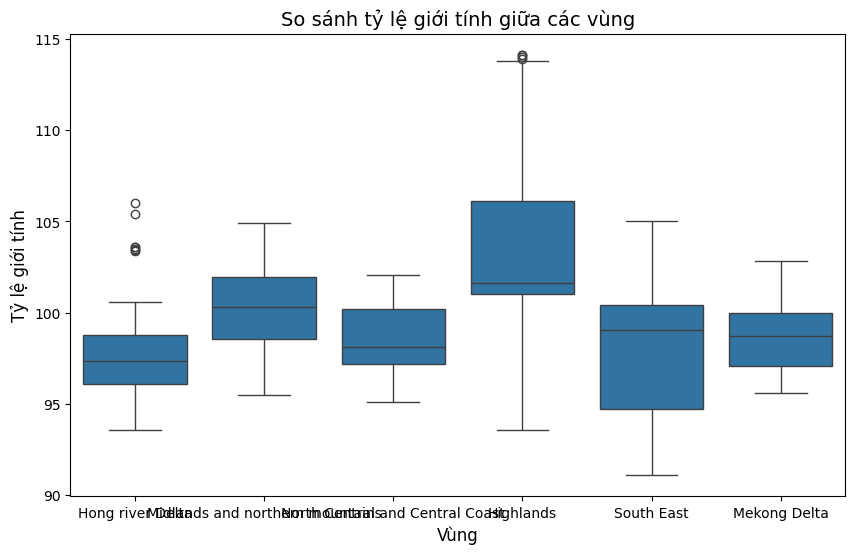

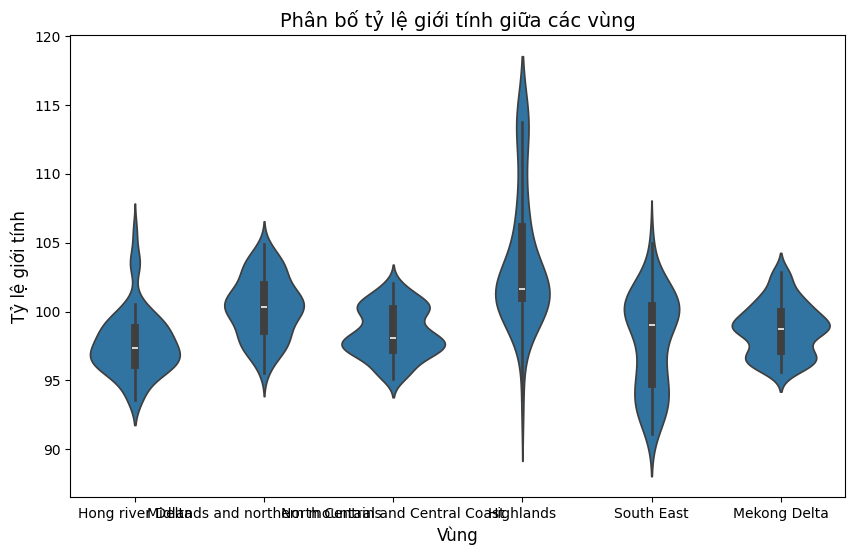

                                 count        mean       std    min       25%  \
Region                                                                          
Highlands                         50.0  103.707800  4.862163  93.60  101.0000   
Hong river Delta                 110.0   97.702545  2.360650  93.60   96.1000   
Mekong Delta                     130.0   98.755385  1.877455  95.60   97.1000   
Midlands and northern mountains  140.0  100.308429  2.223845  95.51   98.5525   
North Central and Central Coast  140.0   98.475357  1.782001  95.10   97.2000   
South East                        60.0   97.799667  3.473372  91.10   94.7250   

                                    50%     75%     max  
Region                                                   
Highlands                        101.65  106.13  114.10  
Hong river Delta                  97.35   98.80  106.00  
Mekong Delta                      98.70  100.00  102.84  
Midlands and northern mountains  100.30  101.95  104.90  
Nor

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/cleaned/cleaned_population.csv")

# Biểu đồ hộp so sánh tỷ lệ giới tính giữa các vùng
plt.figure(figsize=(10, 6)) #Tăng kích thước biểu đồ
sns.boxplot(x='Region', y='Sex ratio', data=df)
plt.title('So sánh tỷ lệ giới tính giữa các vùng', fontsize=14)
plt.ylabel('Tỷ lệ giới tính', fontsize=12)
plt.xlabel('Vùng', fontsize=12)
plt.show()

# Biểu đồ violin
plt.figure(figsize=(10, 6))
sns.violinplot(x='Region', y='Sex ratio', data=df)
plt.title('Phân bố tỷ lệ giới tính giữa các vùng', fontsize=14)
plt.ylabel('Tỷ lệ giới tính', fontsize=12)
plt.xlabel('Vùng', fontsize=12)
plt.show()

#Thống kê mô tả
print(df.groupby("Region")["Sex ratio"].describe())

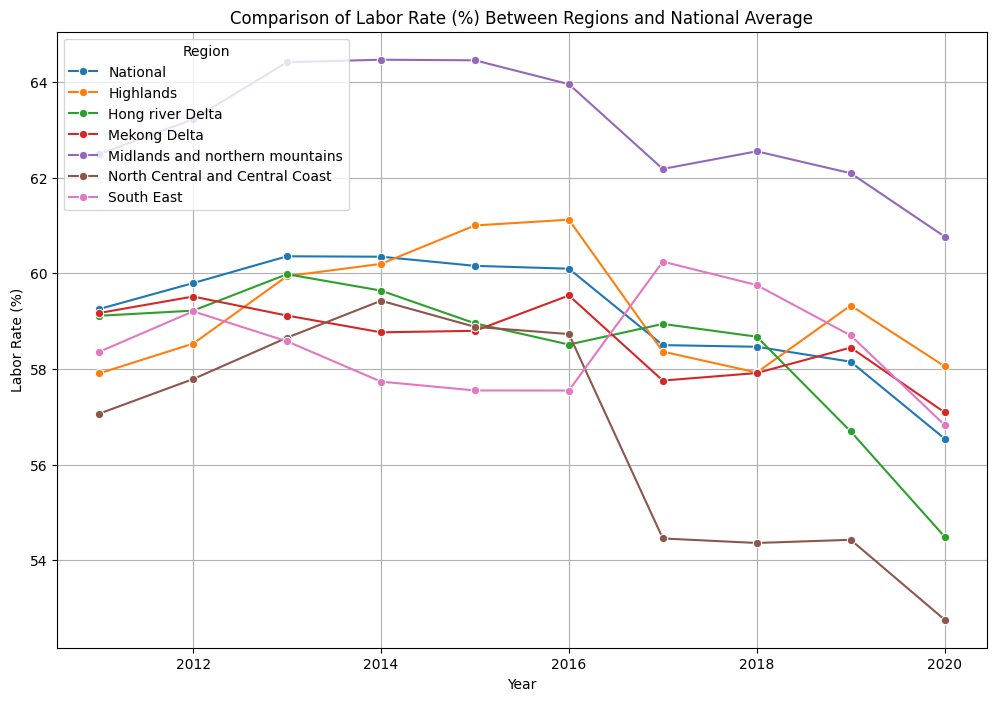

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đọc dữ liệu
file_path = "../data/cleaned/cleaned_population.csv"  # Đường dẫn tới file CSV
df = pd.read_csv(file_path)

# Bước 2: Tính Labor_rate (%)
df['Labor_rate (%)'] = df['15+ labor'] / df['Average population'] * 100

# Bước 3: Tính trung bình toàn quốc theo năm
national_avg = df.groupby("Year").agg({
    "Labor_rate (%)": "mean"
}).reset_index()
national_avg["Region"] = "National"

# Bước 4: Tính trung bình theo khu vực
region_avg = df.groupby(["Region", "Year"]).agg({
    "Labor_rate (%)": "mean"
}).reset_index()

# Gộp dữ liệu toàn quốc và theo khu vực để vẽ biểu đồ
combined_data = pd.concat([national_avg, region_avg])

# Bước 5: Vẽ biểu đồ
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_data, x="Year", y="Labor_rate (%)", hue="Region", marker="o")
plt.title("Comparison of Labor Rate (%) Between Regions and National Average")
plt.xlabel("Year")
plt.ylabel("Labor Rate (%)")
plt.legend(title="Region", loc="upper left")
plt.grid(True)
plt.show()


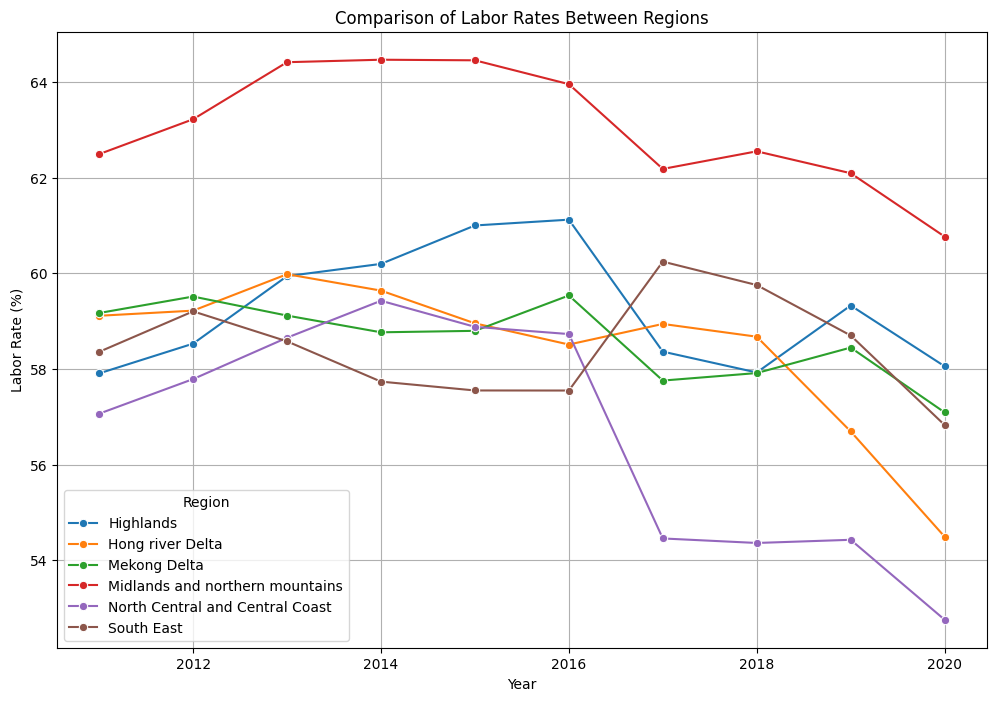

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đọc dữ liệu
file_path = "../data/cleaned/cleaned_population.csv"  # Thay đường dẫn với file của bạn
df = pd.read_csv(file_path)

# Bước 2: Tính Labor_rate (%)
df['Labor_rate (%)'] = df['15+ labor'] / df['Average population'] * 100

# Bước 3: Tính trung bình tỷ lệ lao động theo khu vực
region_avg = df.groupby(["Region", "Year"]).agg({
    "Labor_rate (%)": "mean"
}).reset_index()

# Bước 4: Vẽ biểu đồ so sánh giữa các khu vực
plt.figure(figsize=(12, 8))
sns.lineplot(data=region_avg, x="Year", y="Labor_rate (%)", hue="Region", marker="o")
plt.title("Comparison of Labor Rates Between Regions")
plt.xlabel("Year")
plt.ylabel("Labor Rate (%)")
plt.legend(title="Region")
plt.grid(True)
plt.show()


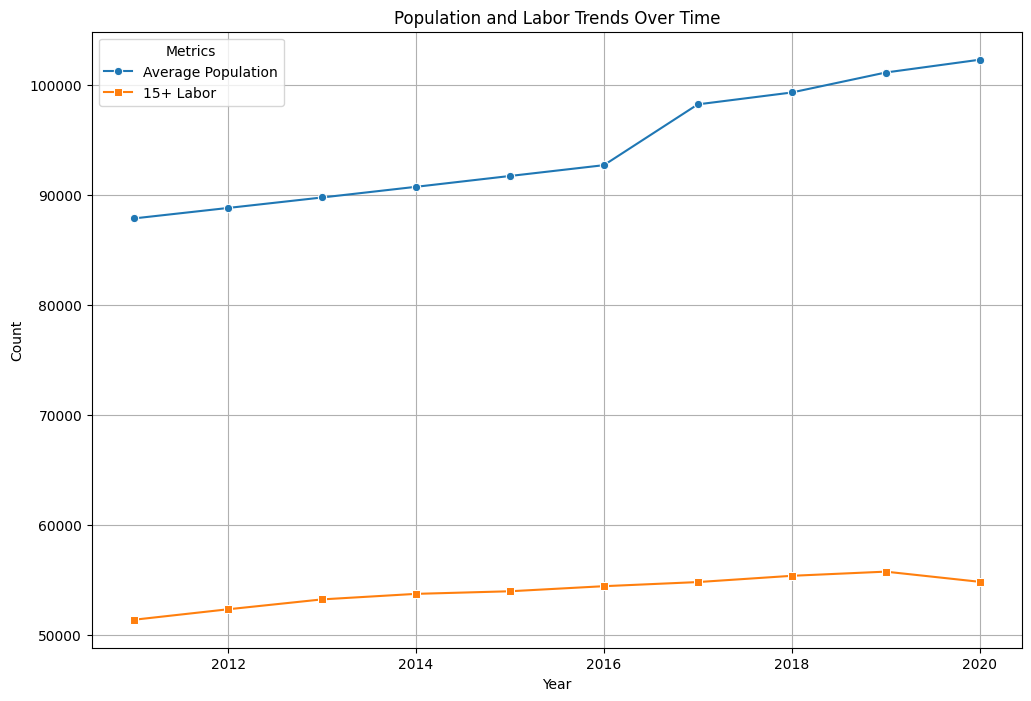

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đọc dữ liệu
file_path = "../data/cleaned/cleaned_population.csv"  # Thay bằng đường dẫn tới file dữ liệu
df = pd.read_csv(file_path)

# Bước 2: Nhóm dữ liệu theo năm và tính tổng dân số và lao động
trends = df.groupby("Year").agg({
    "Average population": "sum", 
    "15+ labor": "sum"
}).reset_index()

# Bước 3: Vẽ biểu đồ xu hướng dân số và lao động theo thời gian
plt.figure(figsize=(12, 8))
sns.lineplot(data=trends, x="Year", y="Average population", marker="o", label="Average Population")
sns.lineplot(data=trends, x="Year", y="15+ labor", marker="s", label="15+ Labor")
plt.title("Population and Labor Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Metrics")
plt.grid(True)
plt.show()


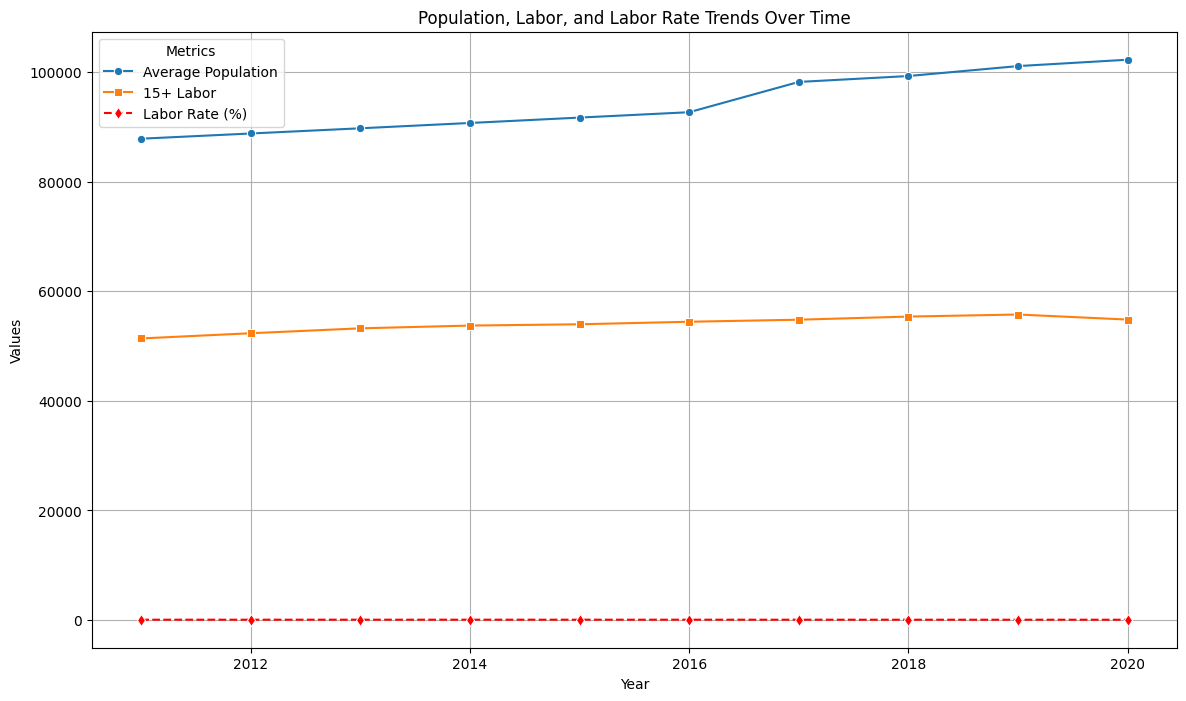

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đọc dữ liệu
file_path = "../data/cleaned/cleaned_population.csv"  # Thay bằng đường dẫn tới file dữ liệu
df = pd.read_csv(file_path)

# Bước 2: Nhóm dữ liệu theo năm và tính tổng dân số, lao động, và Labor_rate (%)
trends = df.groupby("Year").agg({
    "Average population": "sum",
    "15+ labor": "sum"
}).reset_index()

# Tính Labor_rate (%)
trends["Labor_rate (%)"] = (trends["15+ labor"] / trends["Average population"]) * 100

# Bước 3: Vẽ biểu đồ xu hướng dân số, lao động, và tỷ lệ lao động
plt.figure(figsize=(14, 8))

# Dân số trung bình
sns.lineplot(data=trends, x="Year", y="Average population", marker="o", label="Average Population")
# Lao động 15+
sns.lineplot(data=trends, x="Year", y="15+ labor", marker="s", label="15+ Labor")
# Labor_rate (%)
sns.lineplot(data=trends, x="Year", y="Labor_rate (%)", marker="d", label="Labor Rate (%)", linestyle="--", color="red")

# Cài đặt biểu đồ
plt.title("Population, Labor, and Labor Rate Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend(title="Metrics")
plt.grid(True)
plt.show()


In [16]:
import pandas as pd

# Bước 1: Đọc dữ liệu
file_path = "../data/cleaned/cleaned_population.csv"  
df = pd.read_csv(file_path)

# Bước 2: Tính Labor_rate (%)
df['Labor_rate (%)'] = (df['15+ labor'] / df['Average population']) * 100

# Bước 3: Lưu cột mới vào file CSV
output_file = "updated_file_with_labor_rate.csv"  
df.to_csv(output_file, index=False)

print(f"Dữ liệu đã được lưu vào {output_file}")


Dữ liệu đã được lưu vào updated_file_with_labor_rate.csv


In [17]:
df

,Provinces/city,Population density,Average population,Sex ratio,Population grow ratio,15+ labor,Region,Year,Labor_rate (%)
0,Ha Noi,2031.1,6761.3,97.80,1.93,3572.90,Hong river Delta,2011,52.843388
1,Vinh Phuc,818.0,1011.4,97.60,0.38,608.30,Hong river Delta,2011,60.144354
2,Bac Ninh,1292.6,1063.4,96.70,1.84,593.50,Hong river Delta,2011,55.811548
3,Quang Ninh,191.4,1168.0,105.40,0.93,675.00,Hong river Delta,2011,57.791096
4,Hai Duong,1044.6,1729.8,96.10,0.78,1071.00,Hong river Delta,2011,61.914672
...,...,...,...,...,...,...,...,...,...
625,Can Tho,862.0,1240.7,98.65,0.39,716.78,Mekong Delta,2020,57.772225
626,Hau Giang,450.0,729.8,101.38,-0.33,402.33,Mekong Delta,2020,55.128802
627,Soc Trang,361.0,1195.7,99.34,-0.32,641.91,Mekong Delta,2020,53.684871
628,Bac Lieu,342.0,913.5,100.15,0.58,507.76,Mekong Delta,2020,55.584018


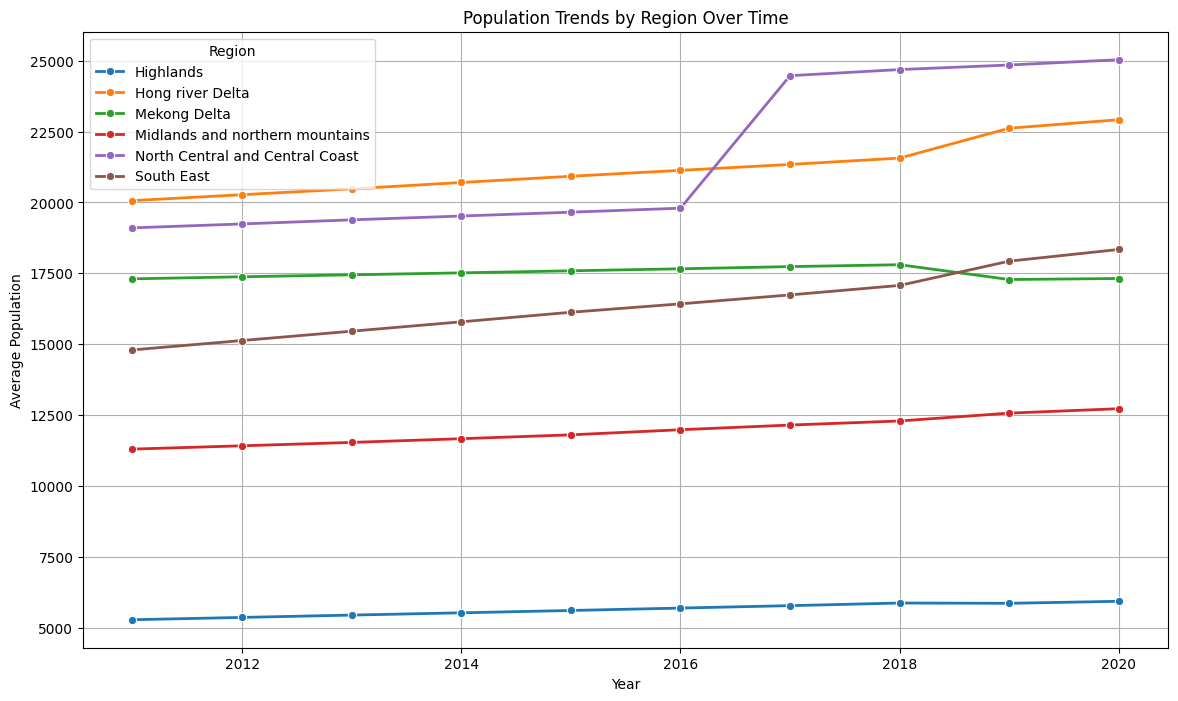

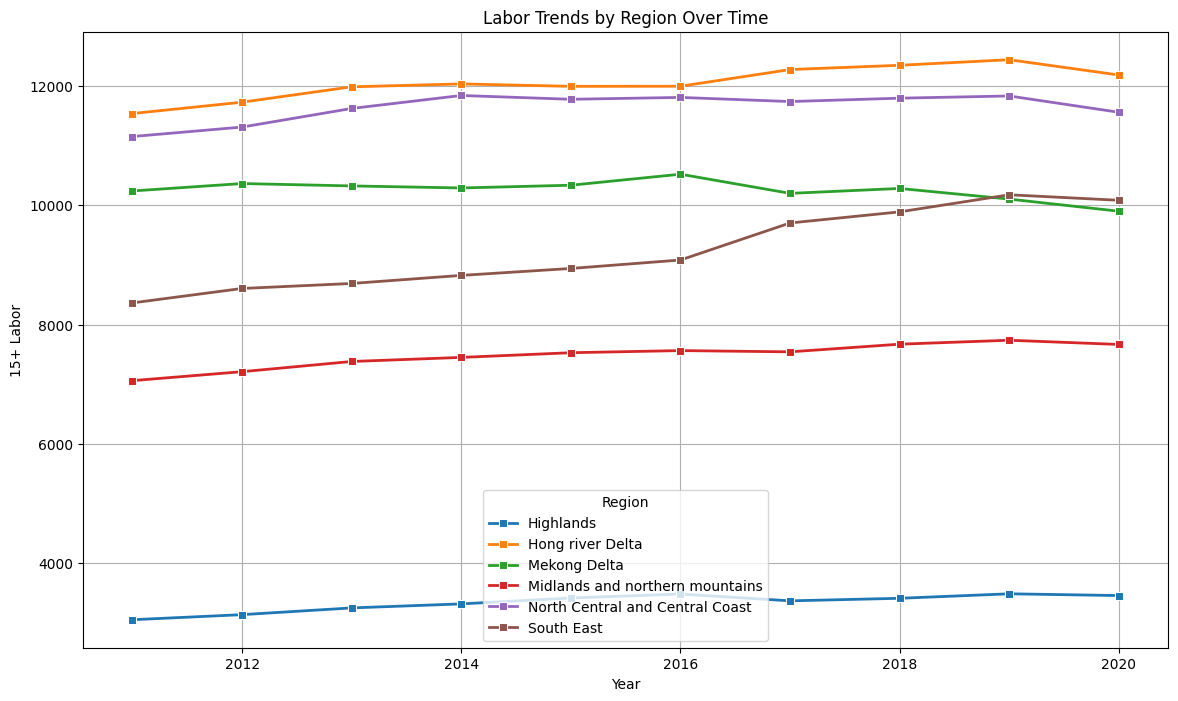

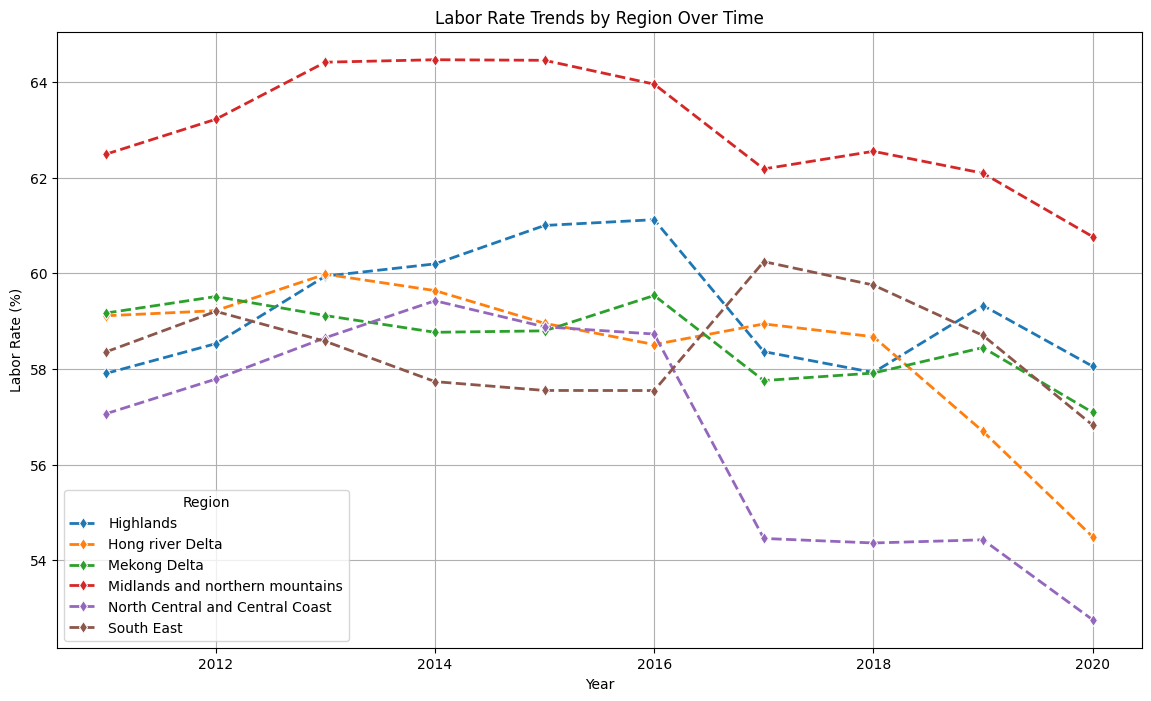

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đọc dữ liệu
file_path = "../data/cleaned/cleaned_population.csv"  # Thay bằng đường dẫn tới file của bạn
df = pd.read_csv(file_path)

# Bước 2: Tính Labor_rate (%)
df['Labor_rate (%)'] = (df['15+ labor'] / df['Average population']) * 100

# Bước 3: Nhóm dữ liệu theo khu vực và năm
region_trends = df.groupby(["Region", "Year"]).agg({
    "Average population": "sum",
    "15+ labor": "sum",
    "Labor_rate (%)": "mean"  # Tính trung bình tỷ lệ lao động
}).reset_index()

# Bước 4: Vẽ biểu đồ xu hướng theo khu vực
plt.figure(figsize=(14, 8))

# Vẽ xu hướng dân số
sns.lineplot(data=region_trends, x="Year", y="Average population", hue="Region", marker="o", linewidth=2)
plt.title("Population Trends by Region Over Time")
plt.xlabel("Year")
plt.ylabel("Average Population")
plt.legend(title="Region")
plt.grid(True)

# Tạo biểu đồ thứ hai cho xu hướng lao động
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_trends, x="Year", y="15+ labor", hue="Region", marker="s", linewidth=2)
plt.title("Labor Trends by Region Over Time")
plt.xlabel("Year")
plt.ylabel("15+ Labor")
plt.legend(title="Region")
plt.grid(True)

# Tạo biểu đồ thứ ba cho tỷ lệ lao động
plt.figure(figsize=(14, 8))
sns.lineplot(data=region_trends, x="Year", y="Labor_rate (%)", hue="Region", marker="d", linewidth=2, linestyle="--")
plt.title("Labor Rate Trends by Region Over Time")
plt.xlabel("Year")
plt.ylabel("Labor Rate (%)")
plt.legend(title="Region")
plt.grid(True)

plt.show()


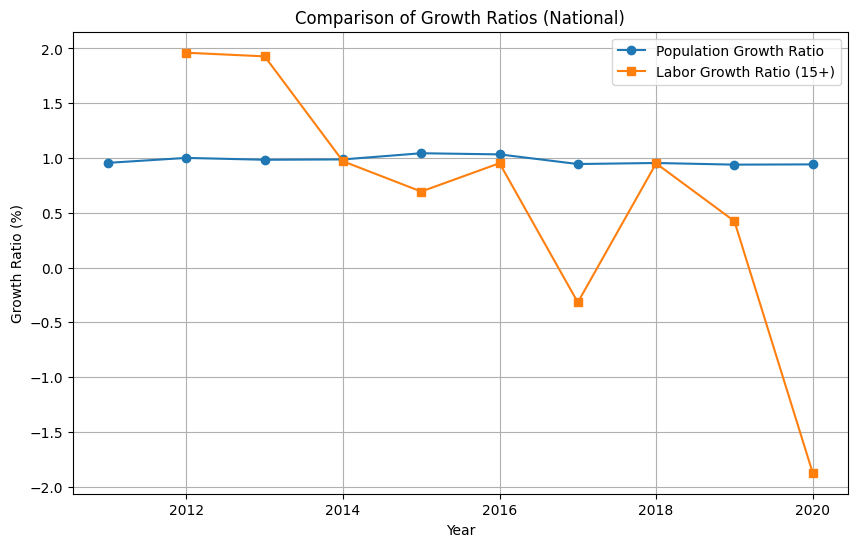

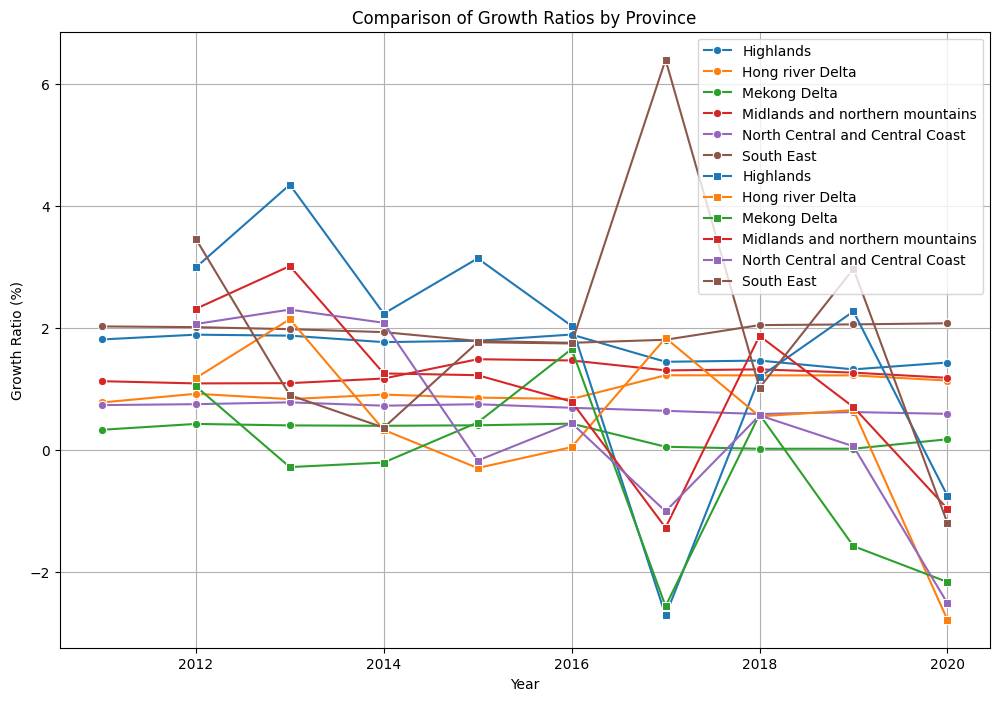

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bước 1: Đọc dữ liệu
file_path = "../data/filtered/Region/labor_growth_rate_by_province.csv"  # File sau khi tính toán
data = pd.read_csv(file_path)

# Giả sử cột "Population_Growth_Ratio" đã có trong dữ liệu gốc
# Nếu không có, bạn cần tính thêm tỷ lệ này trước

# Bước 2: Tính trung bình toàn quốc theo năm
national_avg = data.groupby("Year").agg({
    "Population grow ratio": "mean",
    "Growth_Rate (%)": "mean"
}).reset_index()

# Bước 3: Tính trung bình theo từng khu vực
region_avg = data.groupby(["Region", "Year"]).agg({
    "Population grow ratio": "mean",
    "Growth_Rate (%)": "mean"
}).reset_index()

# Bước 4: Vẽ biểu đồ toàn quốc
plt.figure(figsize=(10, 6))
plt.plot(national_avg["Year"], national_avg["Population grow ratio"], marker='o', label="Population Growth Ratio")
plt.plot(national_avg["Year"], national_avg["Growth_Rate (%)"], marker='s', label="Labor Growth Ratio (15+)")
plt.title("Comparison of Growth Ratios (National)")
plt.xlabel("Year")
plt.ylabel("Growth Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()

# Bước 5: Vẽ biểu đồ theo từng khu vực
plt.figure(figsize=(12, 8))
sns.lineplot(data=region_avg, x="Year", y="Population grow ratio", hue="Region", marker='o')
sns.lineplot(data=region_avg, x="Year", y="Growth_Rate (%)", hue="Region", marker='s')
plt.title("Comparison of Growth Ratios by Province")
plt.xlabel("Year")
plt.ylabel("Growth Ratio (%)")
plt.legend()
plt.grid(True)
plt.show()


Dự đoán dân số năm 2025: 1758.2866378066392
Dự đoán dân số năm 2030: 1896.3385858585898


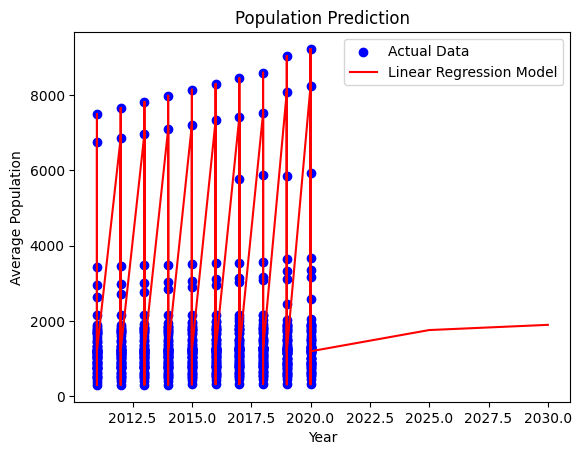

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv("../data/cleaned/cleaned_population.csv")

# Chuẩn bị dữ liệu cho mô hình
X = df['Year'].values.reshape(-1, 1)  # Reshape để phù hợp với sklearn
y = df['Average population'].values

# Tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Dự đoán dân số cho các năm trong tương lai (ví dụ: 2025, 2030)
future_years = np.array([[2025], [2030]])
future_population = model.predict(future_years)

print(f"Dự đoán dân số năm 2025: {future_population[0]}")
print(f"Dự đoán dân số năm 2030: {future_population[1]}")

#Vẽ kết quả dự đoán
plt.scatter(X,y, color = 'b', label = 'Actual Data')
plt.plot(np.concatenate([X, future_years]), np.concatenate([y,future_population]), color='r', label = "Linear Regression Model")
plt.title('Population Prediction')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.legend()
plt.show()